In [1]:
import matplotlib.pyplot as plt
import multiprocessing   as mp
import numpy as np
import gym
import Portfolio_Gym
from A2C_tf import Actor_Critic

In [2]:
Retrain_Frequency = 100
Sigma_Range       = [2, 0.05]
Sigma_Anneal      = 1

Gamma  = 1

AC_Hypers   = {"Learning Rate" : 0.001,
              "Epoch"         : 20,
              "Network Size"  : [32, 16],
              "Activation"    : "Sigmoid",
              "solver"        : 'Adam',
              "Alpha_A"       : 0.01,
              "Alpha_V"       : 0.01}


Env = gym.make('Historical_Monthly-v1')
Env.Set_Params(Risk_Aversion = 1,   Episode_Length = 60,   Max_Leverage  = 750,
               Min_Leverage = -750, Validation_Frac = 0.3, Intermediate_Reward = True)

myAC = Actor_Critic(Env, AC_Hypers, Gamma, Sigma_Range, Sigma_Anneal, Retrain_Frequency)

C:\Users\Hli\Anaconda3\lib\site-packages\gym\envs\registration.py:14: PkgResourcesDeprecationWarning: Parameters to load are deprecated.  Call .resolve and .require separately.
  result = entry_point.load(False)


Updating to Model Version 1...
Updating to Model Version 2...
Updating to Model Version 3...
Updating to Model Version 4...
Updating to Model Version 5...
Updating to Model Version 6...
Updating to Model Version 7...
Updating to Model Version 8...
Updating to Model Version 9...
Updating to Model Version 10...
Updating to Model Version 11...
Updating to Model Version 12...
Updating to Model Version 13...
Updating to Model Version 14...
Updating to Model Version 15...
Updating to Model Version 16...
Updating to Model Version 17...
Updating to Model Version 18...
Updating to Model Version 19...
Updating to Model Version 20...
Updating to Model Version 21...
Updating to Model Version 22...
Updating to Model Version 23...
Updating to Model Version 24...
Updating to Model Version 25...
Updating to Model Version 26...
Updating to Model Version 27...
Updating to Model Version 28...
Updating to Model Version 29...
Updating to Model Version 30...
Updating to Model Version 31...
Updating to Model

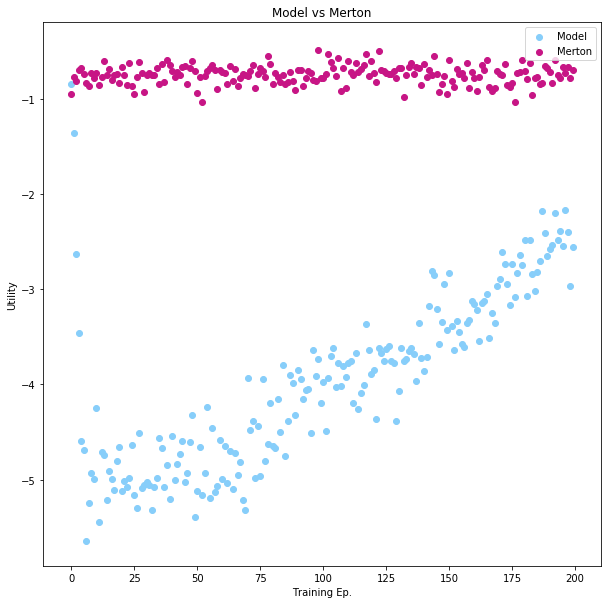

In [3]:
Another = 200
Model_Scores, Merton_Scores = myAC.Train(Another)
f, ax = plt.subplots(1,1, figsize = (10,10))
ax.scatter(np.arange(len(Model_Scores)), Model_Scores, label = 'Model', color = 'lightskyblue')
ax.scatter(np.arange(len(Model_Scores)), Merton_Scores, label = 'Merton', color = 'mediumvioletred')
ax.set_title('Model vs Merton')
ax.set_ylabel("Utility")
ax.set_xlabel("Training Ep.")
ax.legend()
plt.show()

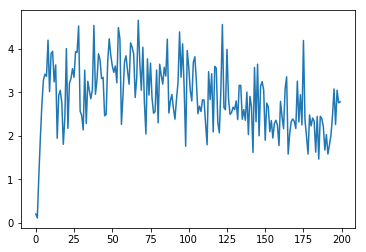

In [4]:
plt.plot([Model_Scores[i]/Merton_Scores[i] - 1 for i in range(len(Model_Scores))])

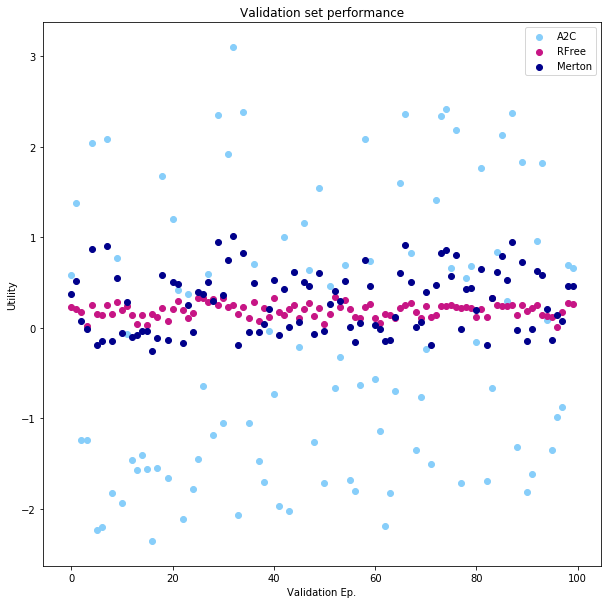

In [5]:
Results = Env.Validate(100, myAC)

f, ax = plt.subplots(1,1, figsize = (10,10))
ax.scatter(np.arange(len(Results[0])), Results[0], label = 'A2C', color = 'lightskyblue')
ax.scatter(np.arange(len(Results[1])), Results[1], label = 'RFree', color = 'mediumvioletred')
ax.scatter(np.arange(len(Results[2])), Results[2], label = 'Merton', color = 'darkblue')

ax.set_title('Validation set performance')
ax.set_ylabel("Utility")
ax.set_xlabel("Validation Ep.")
ax.legend()
plt.show()


In [6]:
Retrain_Frequency = 100
Sigma_Range       = [2, 0.05]
Sigma_Anneal      = 1

Gamma  = 1

AC_Hypers   = {"Learning Rate" : 0.001,
              "Epoch"         : 20,
              "Network Size"  : [32, 16],
              "Activation"    : "Sigmoid",
              "solver"        : 'Adam',
              "Alpha_A"       : 0.01,
              "Alpha_V"       : 0.01}


Env_V0 = gym.make('Historical_Monthly-v0')
Env_V0.Set_Params(Risk_Aversion = 1,   Episode_Length = 60,   Max_Leverage  = 750,
               Min_Leverage = -750, Validation_Frac = 0.3, Intermediate_Reward = True)

myAC_daily = Actor_Critic(Env_V0, AC_Hypers, Gamma, Sigma_Range, Sigma_Anneal, Retrain_Frequency)

C:\Users\Hli\Anaconda3\lib\site-packages\gym\envs\registration.py:14: PkgResourcesDeprecationWarning: Parameters to load are deprecated.  Call .resolve and .require separately.
  result = entry_point.load(False)


Updating to Model Version 1...
Updating to Model Version 2...
Updating to Model Version 3...
Updating to Model Version 4...
Updating to Model Version 5...
Updating to Model Version 6...
Updating to Model Version 7...
Updating to Model Version 8...
Updating to Model Version 9...
Updating to Model Version 10...
Updating to Model Version 11...
Updating to Model Version 12...
Updating to Model Version 13...
Updating to Model Version 14...
Updating to Model Version 15...
Updating to Model Version 16...
Updating to Model Version 17...
Updating to Model Version 18...
Updating to Model Version 19...
Updating to Model Version 20...
Updating to Model Version 21...
Updating to Model Version 22...
Updating to Model Version 23...
Updating to Model Version 24...
Updating to Model Version 25...
Updating to Model Version 26...
Updating to Model Version 27...
Updating to Model Version 28...
Updating to Model Version 29...
Updating to Model Version 30...
Updating to Model Version 31...
Updating to Model

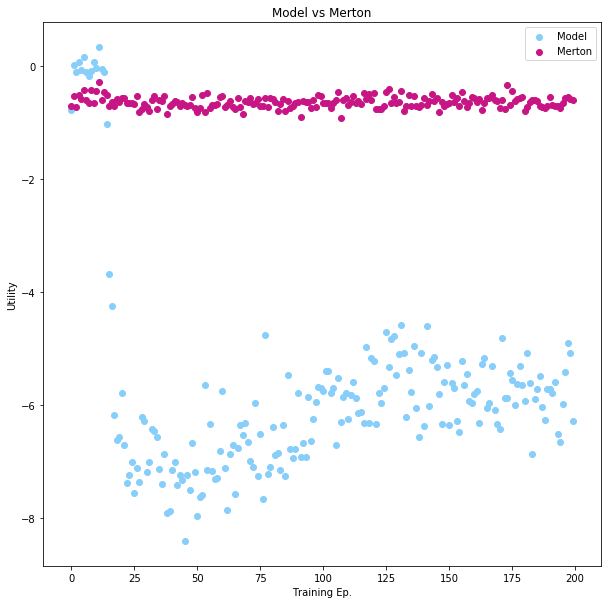

In [7]:
Another = 200
Model_Scores, Merton_Scores = myAC_daily.Train(Another)
f, ax = plt.subplots(1,1, figsize = (10,10))
ax.scatter(np.arange(len(Model_Scores)), Model_Scores, label = 'Model', color = 'lightskyblue')
ax.scatter(np.arange(len(Model_Scores)), Merton_Scores, label = 'Merton', color = 'mediumvioletred')
ax.set_title('Model vs Merton')
ax.set_ylabel("Utility")
ax.set_xlabel("Training Ep.")
ax.legend()
plt.show()

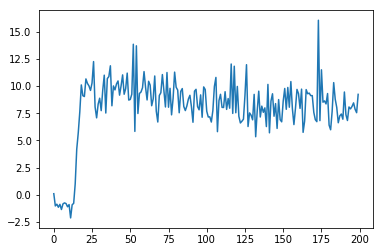

In [8]:
plt.plot([Model_Scores[i]/Merton_Scores[i] -1 for i in range(len(Model_Scores))])

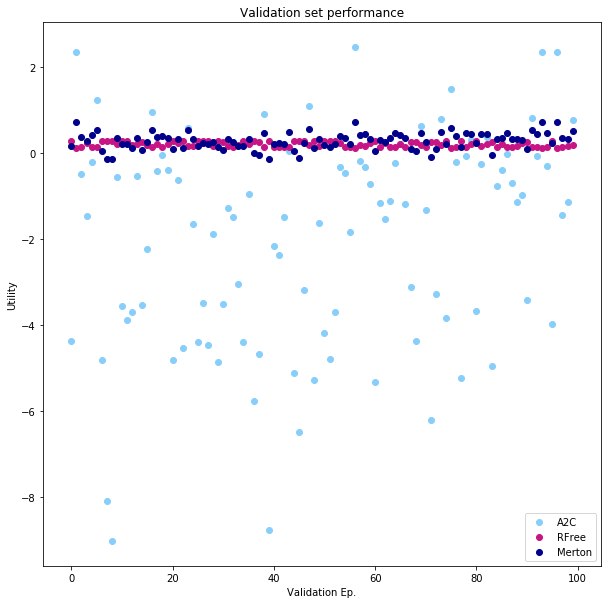

In [10]:
Results = Env_V0.Validate(100, myAC_daily)

f, ax = plt.subplots(1,1, figsize = (10,10))
ax.scatter(np.arange(len(Results[0])), Results[0], label = 'A2C', color = 'lightskyblue')
ax.scatter(np.arange(len(Results[1])), Results[1], label = 'RFree', color = 'mediumvioletred')
ax.scatter(np.arange(len(Results[2])), Results[2], label = 'Merton', color = 'darkblue')

ax.set_title('Validation set performance')
ax.set_ylabel("Utility")
ax.set_xlabel("Validation Ep.")
ax.legend()
plt.show()
